In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import bokeh as bk
from calendar import day_name
from IPython.display import display, Markdown
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
%matplotlib inline



In [3]:
Dataset_stations = pd.read_csv('example_sprit_cut_station.csv',sep=';')
Dataset_prices = pd.read_csv('example_sprit_cut_prices.csv',sep=';')

In [4]:
Dataset_stations.head(50)



,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400
5,51d4b5b9-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET BAD DUERKHEIM GUTLEUTSTR. 10,JET,GUTLEUTSTR. 10,\N,67098,BAD DUERKHEIM,\N,49.464100,8.177850
6,51d4b5c5-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt ALZEY FRI...,Supermarkt-Tankstelle am real- Markt,FRIEDRICHSTR. 15,\N,55232,ALZEY,\N,49.742900,8.107890
7,51d4b45d-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt MUTTERSTA...,Supermarkt-Tankstelle am real- Markt,AN DER FOHLENWEIDE 19,\N,67112,MUTTERSTADT,\N,49.425200,8.365010
8,00060458-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:26.000000,Tankhof Iffezheim,Tankhof Iffezheim,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
9,00060385-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:29.000000,FREIE Tankstelle,Schiffer & Nicklaus GmbH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010


In [5]:
Dataset_stations['POST_CODE'].replace(to_replace=['\\N'],value='0',inplace=True)

In [6]:
# Deleting the inactive station
Dataset_stations = Dataset_stations[Dataset_stations.ID != '82e92aca-b1ec-4bcf-3ab5-f192910c2716']

In [7]:
# House_Number, Street,PUBLIC_HOLIDAY_IDENTIFIER, Version and Name has no significance in our analysis, there by deleting the column

Dataset_stations.drop('HOUSE_NUMBER', axis=1, inplace=True)
Dataset_stations.drop('NAME', axis=1, inplace=True)
Dataset_stations.drop('STREET', axis=1, inplace=True)
Dataset_stations.drop('VERSION', axis=1, inplace=True)
Dataset_stations.drop('PUBLIC_HOLIDAY_IDENTIFIER', axis=1, inplace=True)

In [8]:
Dataset_stations['BRAND'].replace(to_replace=['\\N'],value='Null',inplace=True)

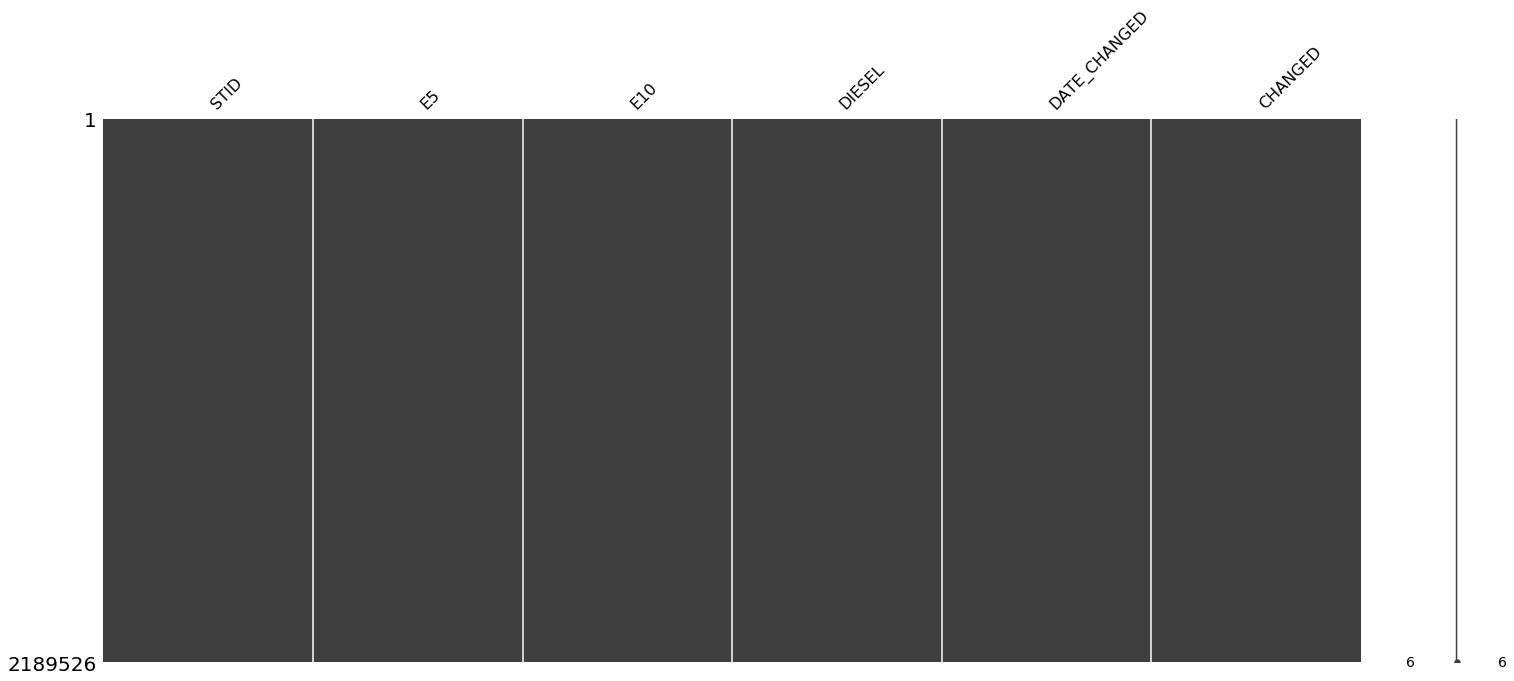

In [9]:
# Visualisation of missing entries
Dataset_stations = pd.read_csv('example_sprit_cut_prices.csv',sep=';')
msno.matrix(Dataset_stations);

In [10]:
Dataset_prices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [11]:
Dataset_prices.drop_duplicates(inplace=True)

In [12]:
def remove_invalid_prices(gasoline):
    gasoline_invalid=Dataset_prices[Dataset_prices[gasoline]<=0]
    Dataset_prices.drop(gasoline_invalid.index,axis=0,inplace=True)

In [13]:
remove_invalid_prices('E5')
remove_invalid_prices('E10')
remove_invalid_prices('DIESEL')

In [14]:
Dataset_prices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [15]:
Dataset_prices.describe()

,E5,E10,DIESEL,CHANGED
count,1.075425e+06,1.075425e+06,1.075425e+06,1.075425e+06
mean,1.457085e+03,1.429118e+03,1.247725e+03,1.900296e+01
std,1.045053e+02,9.922577e+01,1.024969e+02,7.726616e+00
min,8.000000e+00,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [16]:
#As we see Min, max values for the fuels, they are not legitimate, we need to normalise the data.
def normalise_data(gasoline):
    data_mean, data_std = Dataset_prices[gasoline].mean(), Dataset_prices[gasoline].std()
    # identify outliers upto 3 standard deviations
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    Dataset_prices[gasoline]=np.where(np.logical_or(Dataset_prices[gasoline] <
                                                lower,Dataset_prices[gasoline] > upper), 
                                  Dataset_prices[gasoline].median(), 
                                  Dataset_prices[gasoline])

normalise_data('E5')
normalise_data('E10')
normalise_data('DIESEL')

In [17]:
Dataset_prices.describe()

,E5,E10,DIESEL,CHANGED
count,1.075425e+06,1.075425e+06,1.075425e+06,1.075425e+06
mean,1.456998e+03,1.429060e+03,1.247647e+03,1.900296e+01
std,1.010930e+02,9.693802e+01,9.944063e+01,7.726616e+00
min,1.148000e+03,1.139000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,1.769000e+03,1.719000e+03,1.549000e+03,6.300000e+01


In [18]:
# Changing the feul price to Euros
for fuel in ('E5','E10','DIESEL'):
    Dataset_prices[fuel] = Dataset_prices[fuel]/1000

In [19]:
# Standardising the date and time 
Dataset_prices['DATE_CHANGED'] = pd.to_datetime(Dataset_prices['DATE_CHANGED'])

In [20]:
Dataset_prices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.589,1.549,1.389,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.369,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.359,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.539,1.499,1.339,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.529,1.489,1.329,2014-10-03 14:14:01,21


In [24]:
Dataset_stations.rename(columns={'ID':'STID'}, inplace=True)


In [ ]:
Dataset_merged= pd.merge(Dataset_prices,Dataset_stations, on='STID')

In [ ]:
Dataset_merged.head()

In [ ]:
####1. How many different stations exist in the data set and what is the existing history in days (bar chart)?

In [ ]:
NoOfstations = Dataset_merged.STID.nunique()
NoOfBrands = Dataset_merged.BRAND.nunique()
display(Markdown('# There are '+str(NoOfstations)+' stations belonging to '+str(NoOfBrands)+' brands'))

In [ ]:
# The existing history
brand_existence = Dataset_merged.groupby('BRAND')['DATE_CHANGED']
brand_start=brand_existence.min().reset_index()
brand_end=brand_existence.max().reset_index()
# get brand history in days
brand_history = (pd.to_datetime(brand_end['DATE_CHANGED'])-pd.to_datetime(brand_start['DATE_CHANGED'])).dt.days
brand_end['No of Days'] = brand_history

display(Markdown('# The existing history'))
dims = (30, 10)
fig, ax = plt.subplots(figsize=dims)
g = sns.barplot(ax=ax,x='BRAND',y='No of Days',data=brand_end);
# rotate labels
plt.setp(g.get_xticklabels(), rotation=90);



In [ ]:
####2. What is the min, mean, max price for each gasoline type and station weekly (time series graph)?

In [ ]:
Dataset_date_changed = Dataset_merged.DATE_CHANGED

def plot_fuel_stats(fuel_name):
    plt.figure(figsize=(20,5))
    plt.title('Prices of '+fuel_name)
    (Dataset_merged.groupby(Dataset_date_changed.dt.week)[fuel_name].max()).plot(label='Max')
    (Dataset_merged.groupby(Dataset_date_changed.dt.week)[fuel_name].mean()).plot(label='Mean')
    (Dataset_merged.groupby(Dataset_date_changed.dt.week)[fuel_name].min()).plot(label='Min')
    plt.legend(loc='upper right');
    plt.xlabel('Number of weeks');
    plt.ylabel('Price in Euro');
    

In [ ]:
####What is cheapest station (in average) and why?

In [ ]:
cheap_E5=Dataset_merged.groupby('BRAND')['E5'].min().sort_values().reset_index()
cheap_E10=Dataset_merged.groupby('BRAND')['E10'].min().sort_values().reset_index()
cheap_DIESEL=Dataset_merged.groupby('BRAND')['DIESEL'].min().sort_values().reset_index()



In [ ]:
x=pd.merge(cheap_E5,cheap_E10)
cheapest_stations=pd.merge(x,cheap_DIESEL)
cheapest_stations['Mean']=cheapest_stations.mean(axis=1)

avg_min_price = cheapest_stations['Mean'].min()
avg_min_price_string = str("{0:.3f}".format((avg_min_price)))+' Euro'

min_index = cheapest_stations['Mean'].idxmin()
cheapest_brand = cheapest_stations.iloc[min_index]['BRAND']

display(Markdown('# The cheapest station in average is '+cheapest_brand+' since it offers all fuels at low price'))
display(Markdown('# The average price is '+avg_min_price_string))

In [ ]:
##4. At which day of a week is the price most likely the cheapest (week profile)?

In [ ]:
day_grouped_obj = Dataset_merged.groupby(Dataset_merged.DATE_CHANGED.dt.day_name())['E5', 'E10','DIESEL'].mean()

day_grouped_obj['Mean']=day_grouped_obj.mean(axis=1)

# Reindex by day of week
day_grouped_obj = day_grouped_obj.groupby(['DATE_CHANGED']).sum().reindex(day_name[0:7]) 

plt.figure(figsize=(20,5))
plt.title('Week Profile')

min_index = day_grouped_obj['Mean'].idxmin()
plt.plot(day_name[0:7], day_grouped_obj['Mean'])

plt.xlabel('Day of the week');
plt.ylabel('Mean Fuel Price in Euro');

display(Markdown('# The cheapest price will be most likely on '+min_index))

In [ ]:
####5. At which hour during a day is the price the cheapest in average (hour profile)?

In [ ]:
hour_grouped_obj = Dataset_merged.groupby(Dataset_merged.DATE_CHANGED.dt.hour)['E5', 'E10','DIESEL'].mean()

hour_grouped_obj['Mean']=hour_grouped_obj.mean(axis=1)

plt.figure(figsize=(20,5))
plt.title('Hour Profile')

min_index = hour_grouped_obj['Mean'].idxmin()
(hour_grouped_obj['Mean']).plot();

display(Markdown('# The cheapest price will be most likely at '+str(min_index)+' Hours'))



In [27]:
####6. How many different station locations are present in the data (visualize via a map)?

In [ ]:
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

# South west of Germany bounds in web mercator coordinates
p = figure(x_range=(818793.446991, 1010373.869043), y_range=(6387689.579736,6282024.377476),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
                         
#coords_df.head()
merc_coords = []
for x,y in set(zip( Dataset_stations['LAT'].tolist(),Dataset_stations['LNG'].tolist())):
    merc_coords.append((transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), y, x))) # longitude first, latitude second.
lats = [x for (x,y) in merc_coords]
longs = [y for (x,y) in merc_coords]
p.circle(x = lats,
         y = longs,line_color="red", 
         fill_color="orange",
         fill_alpha=0.5)
show(p)

output_notebook()
display(Markdown('# There are '+str(len(merc_coords))+' different station locations'))

In [ ]:
#####7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasoline types?

In [ ]:
BrandPrice=Dataset_merged[['BRAND','E5','E10','DIESEL','DATE_CHANGED']]
BrandData=BrandPrice.BRAND.value_counts()
BrandMostStations = BrandData.idxmax()
Dataset_mostbrands= BrandPrice[brand_price['BRAND']==BrandMostStations]
display(Markdown('# The gas station which has most price data points is '+BrandMostStations))


In [ ]:
plt.figure(figsize=(20,5))
plt.title('Weekly Profile of '+BrandMostStations)
Dataset_mostbrands.groupby(Dataset_mostbrands.DATE_CHANGED.dt.week).E5.mean().plot(xticks=range(1,53))
Dataset_mostbrands.groupby(Dataset_mostbrands.DATE_CHANGED.dt.week).E10.mean().plot(xticks=range(1,53))
Dataset_mostbrands.groupby(Dataset_mostbrands.DATE_CHANGED.dt.week).DIESEL.mean().plot(xticks=range(1,53))
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros');

In [ ]:
####8. At which hour during a day do we have the most price changes?

In [ ]:
e5_changes = (BrandPrice.groupby(BrandPrice.DATE_CHANGED.dt.hour))['E5', 'E10','DIESEL'].count()
e5_changes.plot(figsize=(20,5));
max_index = e5_changes.E5.idxmax()
max_num_changes = e5_changes.E5.max().mean()
display(Markdown('# The hour during the day we have the most price changes is at '+str(max_index)+' Hours with '+str(int(max_num_changes))+' changes'));

In [ ]:
####9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel

In [ ]:
brand_group = brand_end.groupby('No of Days')
max_idx = brand_group['BRAND'].count().idxmax()
top_brand_list = (brand_group.get_group(max_idx)['BRAND'][:20]).to_list()
top_brand_list

In [ ]:
month_grouped_obj = Dataset_merged.groupby(Dataset_merged.DATE_CHANGED.dt.month_name())['E10','DIESEL'].mean()


In [ ]:
month_grouped_obj['Mean']=month_grouped_obj.mean(axis=1)
hour_grouped_obj = Dataset_merged.groupby(Dataset_merged.DATE_CHANGED.dt.hour)['E10','DIESEL'].mean()
hour_grouped_obj

In [ ]:
for brand in top_brand_list:
    merged_df_brand = Dataset_merged[Dataset_merged['BRAND']==brand]
    month_data = merged_df_brand.groupby(merged_df_brand.DATE_CHANGED.dt.month_name())['E10','DIESEL'].mean()

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.heatmap(month_data, cbar_kws={'format': '%1.2f Euro'}, yticklabels=months);

In [ ]:
##10. Describe a possible business potential in € for the customer . Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)



ANS: Analysing all the data available, we could suggest the below for the customer for maximum benefits for refilling 
    the fuels.

    The cheapest station is Hem and the cheapest price would be on saturday, there fore, fuel at HEM on saturdays.
    According to the statistics, at 18:00 is at the cheapest available time.
    